In [1]:
# Necessary imports for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

# Homework 1
### By Andrei Stefan 

## Exercise 1: CLT
In order to reproduce the results for the assignment, we define the generator for $Z$ as the sum of $n$ random Bernoulli variables. The results have been plotted below and match the ones on the slide.

In [2]:
class ZBernoulli:
    def __init__(self,n,p):
        self.n=n
        self.p=p
        
    def get(self):
        return (np.sum(np.random.binomial(size=n,p=self.p, n=1)) - n*p)/np.sqrt(n*p*(1-p))
    
class ZUniform:
    def __init__(self,n):
        self.n=n
        
    def get(self):
        return (np.sum(np.random.uniform(low = 0,high = 1, size=n))-self.n/2)/np.sqrt(n/12)
        

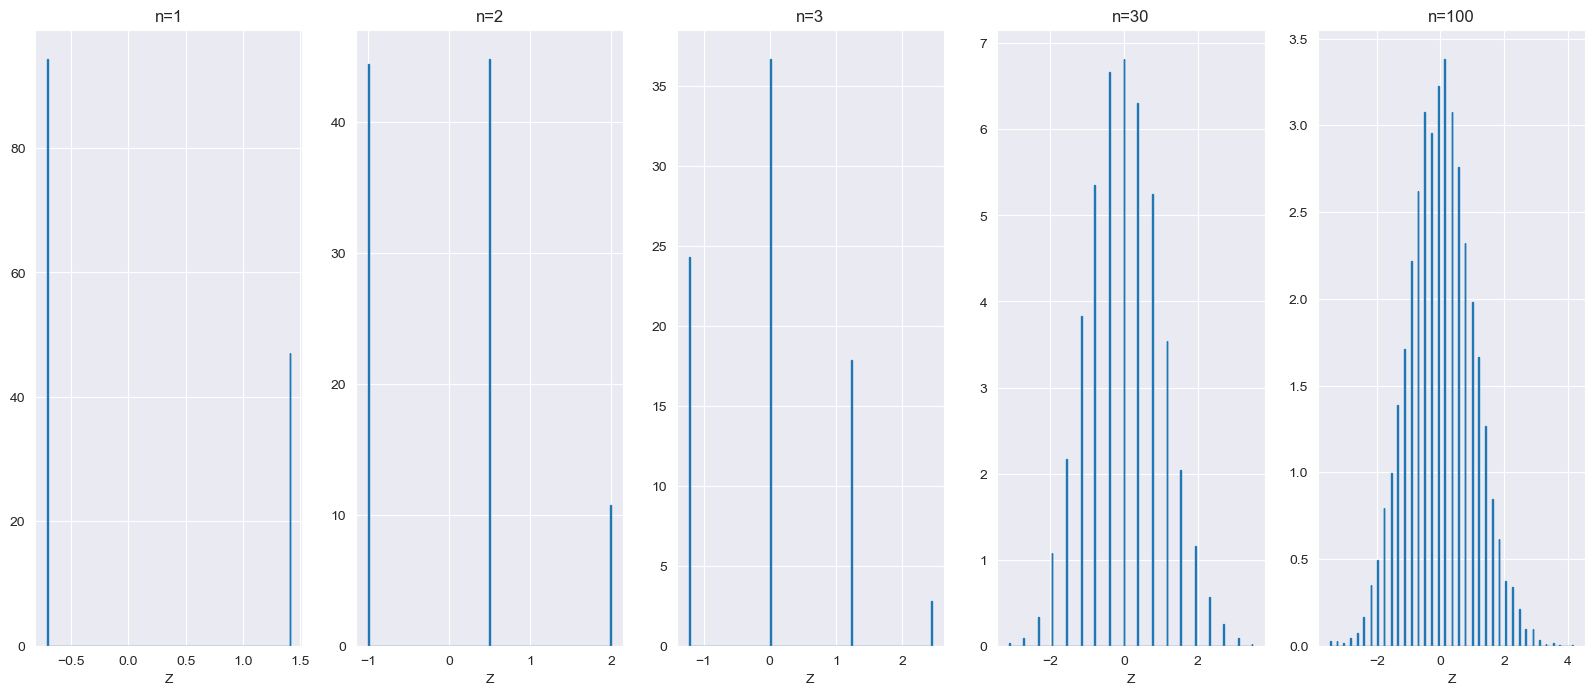

In [3]:
arr = [1,2,3,30,100]
m = 10000
p = 1/3
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZBernoulli(n,p)
    zs = []
    for i in range(m):
        zs.append(z.get())
    zs.sort()
    vals.append(zs)
    axs[ix].hist(zs, bins=300, density=True, histtype='step')
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
    
#print(vals)    
plt.show()

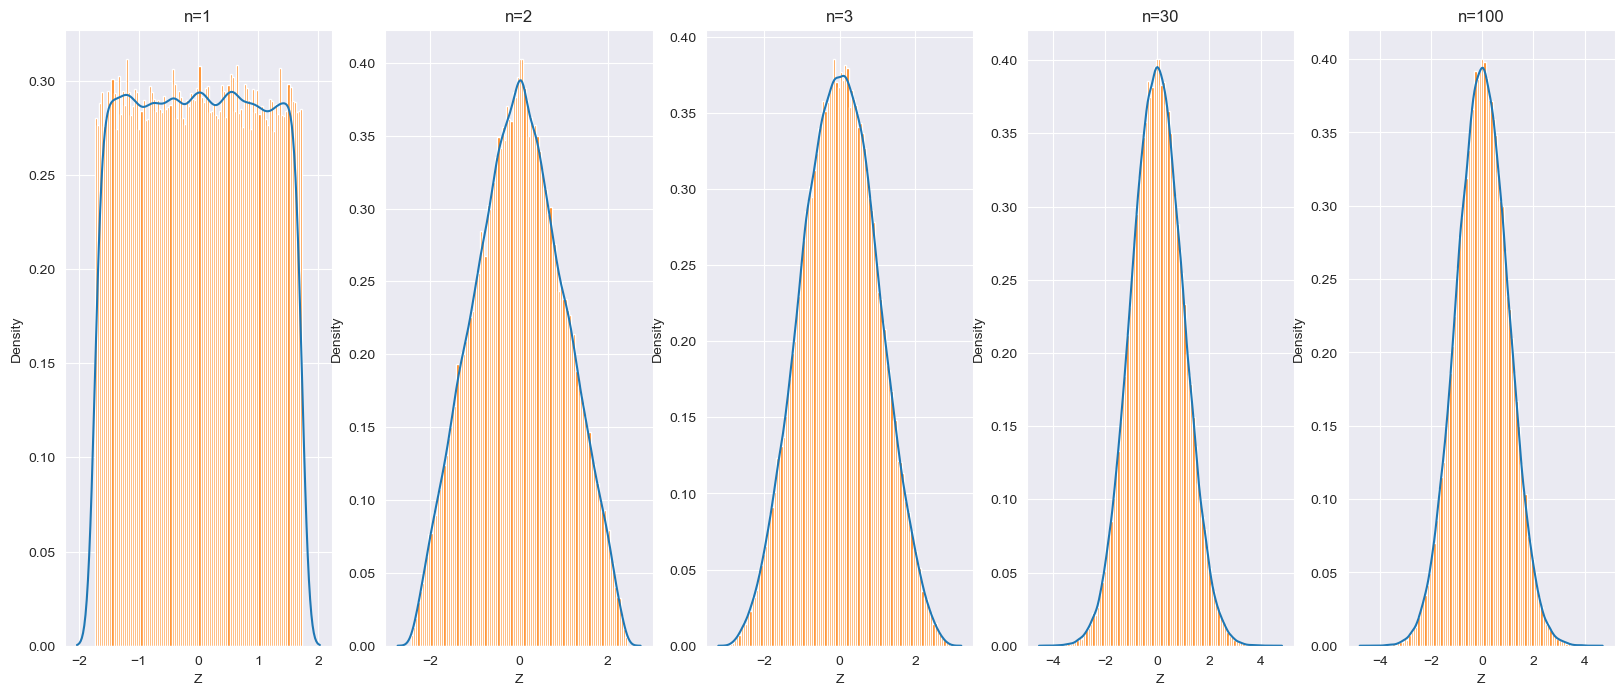

In [4]:
arr = [1,2,3,30,100]
m = 100000
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZUniform(n)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    sns.kdeplot(zs, ax=axs[ix])
    
    # x = np.linspace(-4, 4, 1000)
    # pdf = stats.norm.pdf(x, 0,1)
    # u_pdf = stats.uniform.pdf(x, -np.sqrt(3), 2*np.sqrt(3))
    #  
    # if n==1:
    #     axs[ix].plot(x, u_pdf, 'r')
    # else:
    #     axs[ix].plot(x, pdf, 'r')
    axs[ix].hist(zs, bins=100, density=True)
    
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
plt.show()

## Exercise 2

### Subtask a)

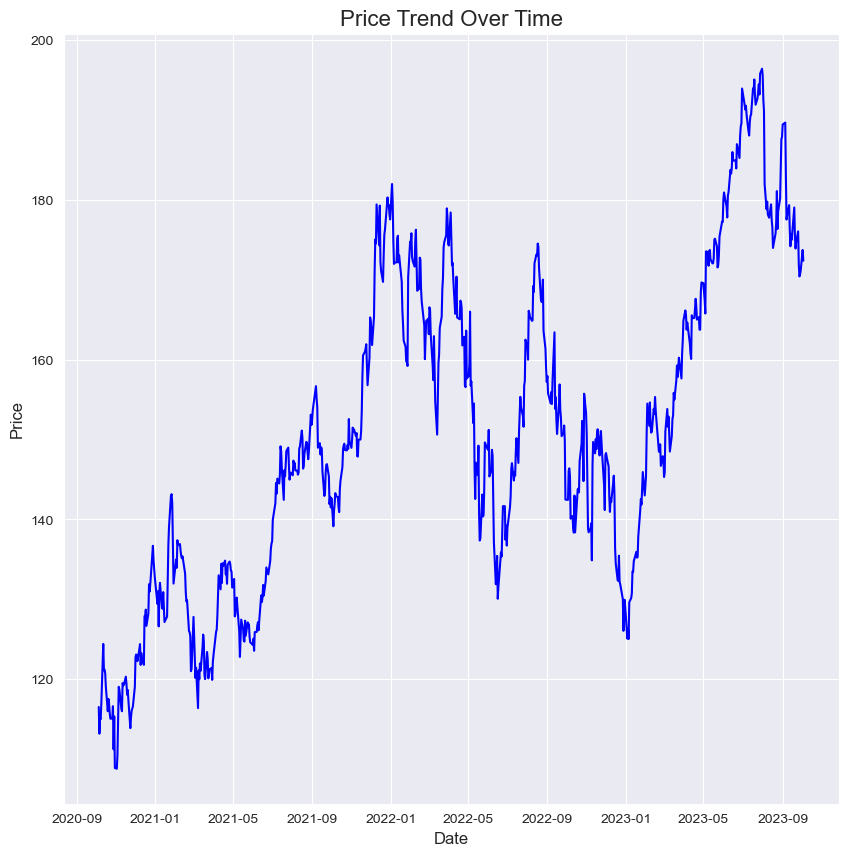

In [5]:
daily_data = pd.read_csv("data/DailyData - STOCK_US_XNAS_AAPL.csv")
#print(daily_data)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.sort_values('Date', inplace=True)
daily_data.set_index('Date', inplace=True)
plt.figure(figsize=(10,10))
plt.title('Price Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(daily_data.index, daily_data.Close, linestyle='-', color='b', label='Price')
plt.show()
#print(daily_data)

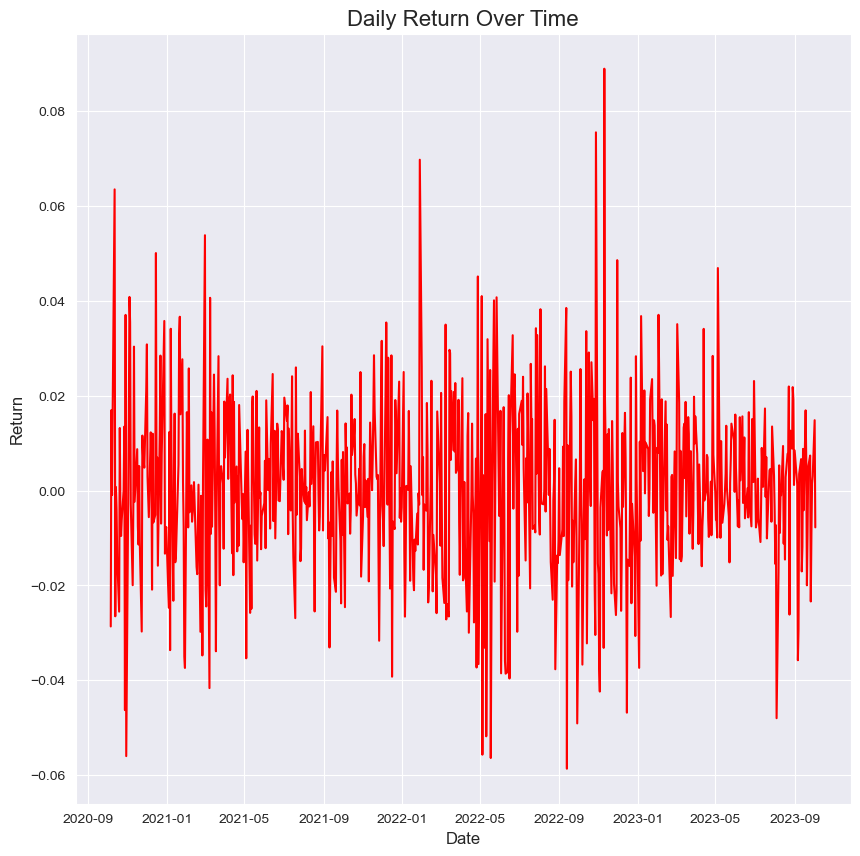

In [6]:
daily_data['Return'] = daily_data['Close'].pct_change()
plt.figure(figsize=(10,10))
plt.title('Daily Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.plot(daily_data.index, daily_data.Return, linestyle='-', color='r', label='Return')
plt.show()

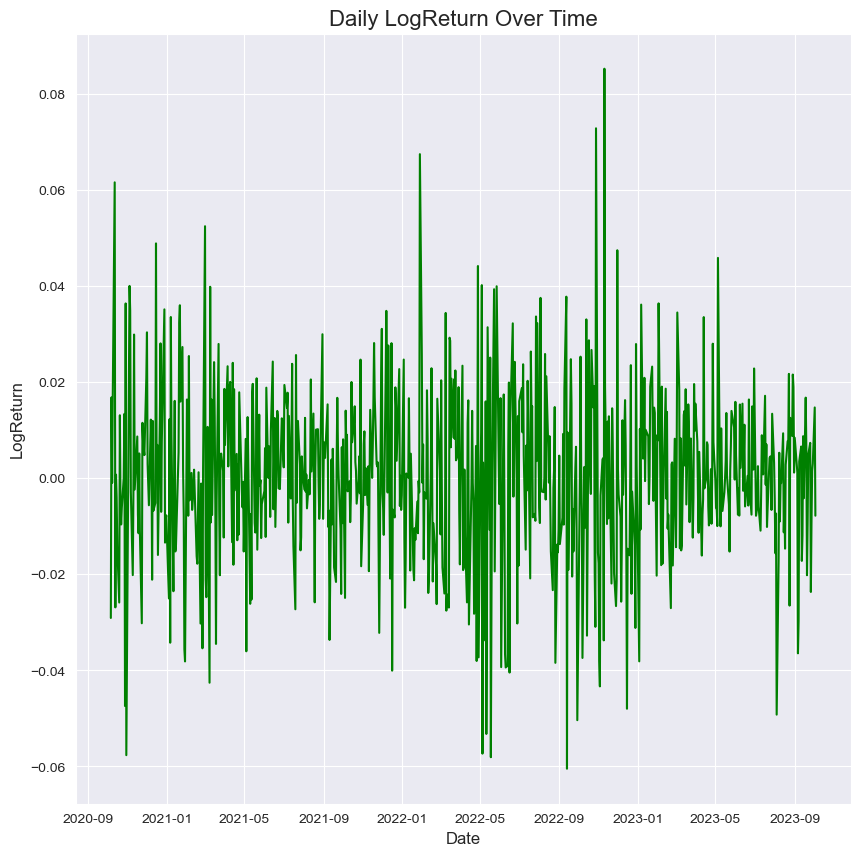

In [7]:
# plot daily logreturn
daily_data['LogReturn'] =   np.log(daily_data['Close']) - np.log(daily_data['Close'].shift(1))  

plt.figure(figsize=(10,10))
plt.title('Daily LogReturn Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('LogReturn', fontsize=12)
plt.plot(daily_data.index, daily_data.LogReturn, linestyle='-', color='g', label='LogReturn')
plt.show()

The daily return and daily log return can be assumed to be equal when the returns are small, for which we can approximate $$\ln(\frac{S_{x}}{S_{x-1}}) \approx \frac{S_{x}-S_{x-1}}{S_{x-1}}$$

### Subtask b)

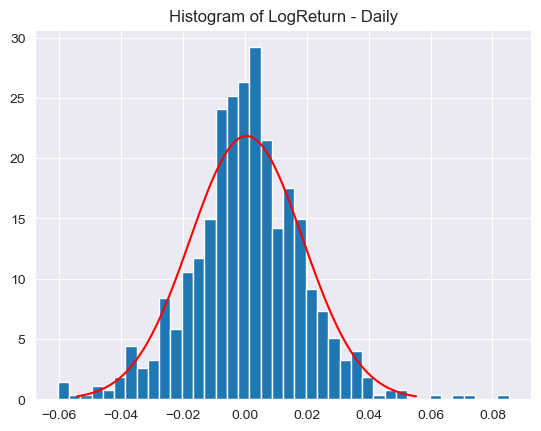

Mean of LogReturn:  0.0005211783048189329
Variance of LogReturn:  0.00033345761273272914


In [8]:
mean = daily_data.LogReturn.mean()
variance = daily_data.LogReturn.var()
stddev = np.sqrt(variance)


plt.hist(daily_data.LogReturn, bins=40, density = True)
plt.title("Histogram of LogReturn - Daily")
x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()



print("Mean of LogReturn: ", mean)
print("Variance of LogReturn: ", variance)


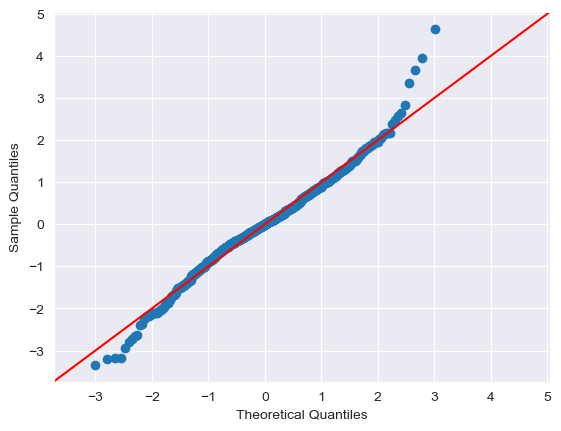

In [9]:
foo = daily_data['LogReturn']
foo = foo.dropna()
#print(foo)
fig = sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

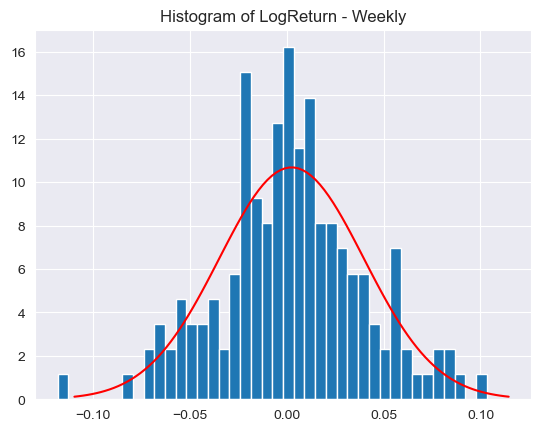

In [10]:
weekly_data = pd.read_csv("data/WeeklyData - STOCK_US_XNAS_AAPL.csv")
# print(daily_data)
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
weekly_data.sort_values('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
weekly_data['LogReturn'] = np.log(weekly_data['Close']) - np.log(weekly_data['Close'].shift(1))


plt.hist(weekly_data.LogReturn, bins=40, density = True)
plt.title("Histogram of LogReturn - Weekly")

mean = weekly_data.LogReturn.mean()
variance = weekly_data.LogReturn.var()
stddev = np.sqrt(variance)

x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()


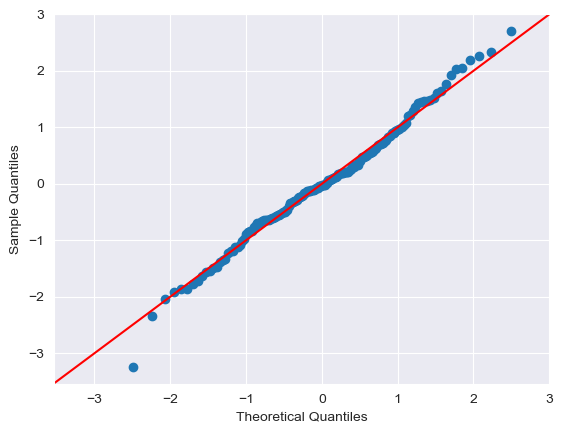

In [11]:
foo = weekly_data['LogReturn']
foo = foo.dropna()
#print(foo)
sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

The daily data has a fatter tail (especially at the larger quantiles) than the normal distribution, while the weekly data fits the line better. As such, the weekly data is better approximated by a normal distribution than the daily data.

### Subtask c)

From the equation (6.9) from the book and the calculation above we can deduce the correlation between logreturns and drift and volatility as follows:
$$\log(\frac{S_{t+1}}{S_t}) = (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i )+ \sigma \sqrt{(t_{i+1} - t_i )} Z_i$$
, which follows a normal distribution $N((\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i), \sigma^2(t_{i+1} - t_i))$.

Since we have already calculated the mean and variance at the previous subpoint, it is now easy to calculate the annualized drift and volatility. ($ \mu = (\hat\mu + \frac{\hat{\sigma}^2}{2}) * n $ and $\sigma = \hat\sigma * \sqrt{n} $, where n is the number of trading periods per year)

In [12]:
def drift_volatility(mean, variance, n):
    mu = (mean - variance/2) * n
    sigma = np.sqrt(variance * n)
    return mu, sigma

annual_drift_d, annual_volatility_d = drift_volatility(daily_data.LogReturn.mean(), daily_data.LogReturn.var(), 252)
annual_drift_w, annual_volatility_w = drift_volatility(weekly_data.LogReturn.mean(), weekly_data.LogReturn.var(), 52)

print("Annualized drift and volatility for daily data: ", annual_drift_d.__round__(4), annual_volatility_d.__round__(4))
print("Annualized drift and volatility for weekly data: ", annual_drift_w.__round__(4), annual_volatility_w.__round__(4))

Annualized drift and volatility for daily data:  0.0893 0.2899
Annualized drift and volatility for weekly data:  0.093 0.2694


## Exercise 3
### Subtask a)

In [13]:
def step(S_ti, mu, sigma, T, L):
    """
    Uses the discrete price model to calculate S_{t+1}
    :param S_ti: The price at time ti
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L: Time steps
    :return: S_{t+1}
    """
    dt = T/L
    return S_ti * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0,1))

In [14]:
def simulate(S0, mu, sigma, T, L_arr, M=1, sum_squares = False, plot = False, hist = False):
    """
    Simulates the price of a stock using the discrete time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L_arr: Time steps (array)
    :param M: Number of simulations
    :param sum_squares: Whether to return the running sum of square increments
    :param plot: Whether to plot the price evolution of the stock
    :param hist: Whether to plot the histogram of the final prices
    """
    if plot and hist:
        raise ValueError("Cannot plot both the price evolution and the histogram")
    
    S_Ts = []
    S_s = []
    for L in L_arr:
        S_T = []
        for x in range (M):
                S = [S0]
                for i in range(L):
                    S.append(step(S[-1], mu, sigma, T, L))
                S_T.append(S[-1])
                S_s.append(S)        
                if plot:
                    plt.plot(S, color = 'gray', linewidth=0.5)
        if hist:
            plt.hist(S_T, bins=100)
            plt.title(f'L={L}, M={M}')
            plt.axvline(x=S0, color='r', linestyle='--')
            plt.show()
        S_Ts.append(S_T)  

        if plot:
            plt.title(f'$ \\Delta $t ={T}, $ \\delta $t={T/L}')
            plt.show()
    #print(S_Ts)
    #print(S_s)
    if sum_squares:
        S_np = np.array(S_s)
        diff  = np.diff(S_np, axis=1)**2
        diff = diff[:, :-1]
        SSIs = diff
        return S_Ts, SSIs
    return S_Ts

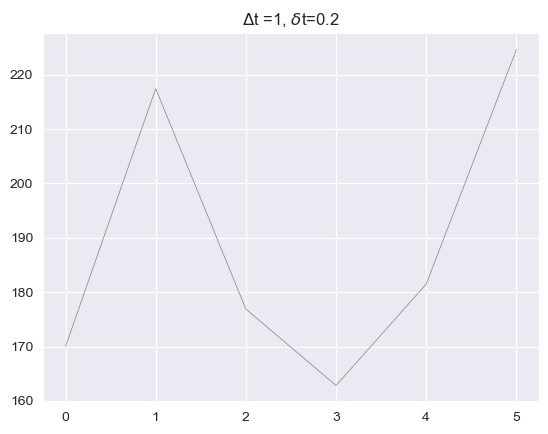

[[224.62219014590394]]

In [27]:
T = 1
S0 = 170
sigma = 0.344
mu = 0.1

L = [5]

M = 5000

simulate(S0, mu, sigma, T, L,M=1, plot=True, hist=False)

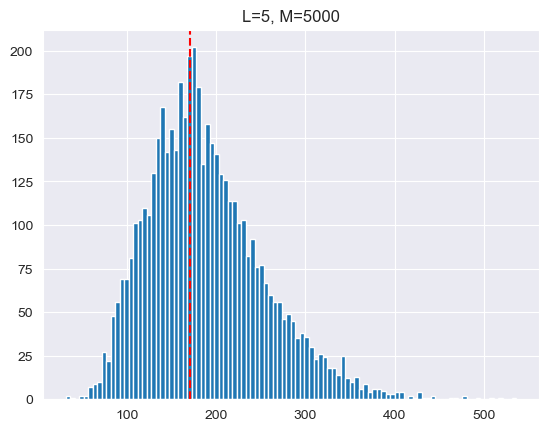

_


In [28]:
simulate(S0, mu, sigma, T, L,M=5000, plot=False, hist=True)
print("_")

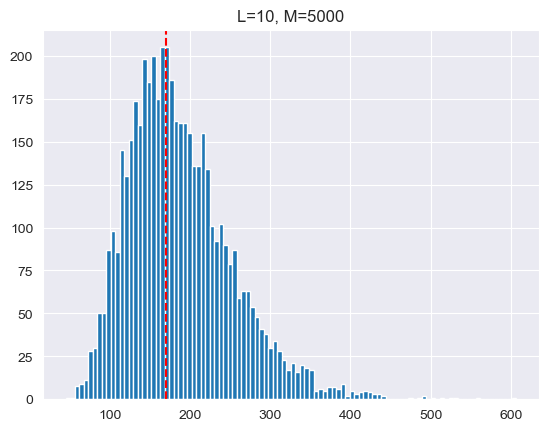

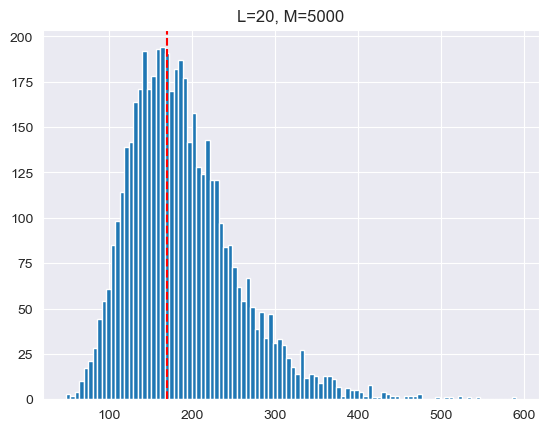

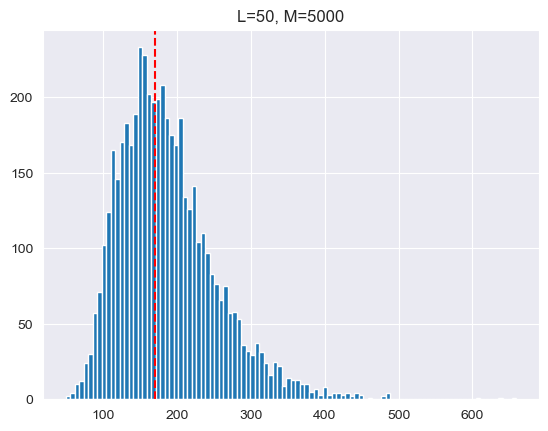

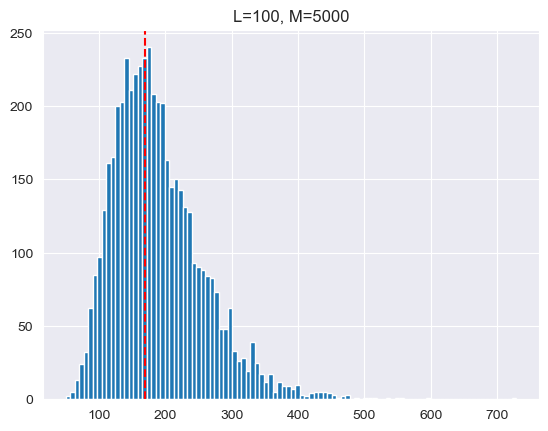

_


In [29]:
simulate(S0, mu, sigma, T, L_arr=[10,20,50,100],M=5000, plot=False, hist=True)
print("_")

### Subtask b)

In [30]:
def cont_time_model(S0, mu, sigma, T, M):
    """
    Simulates the price of a stock using the continuous time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param M: Number of simulations
    """
    S_T = []
    for x in range (M):
        S_T.append(S0 * np.exp((mu - sigma**2/2)*T + sigma*np.sqrt(T)*np.random.normal(0,1)))
    return S_T



[179.65482565 140.48974972 182.88849728 ...  88.82659166 130.27802262
 155.36312137]


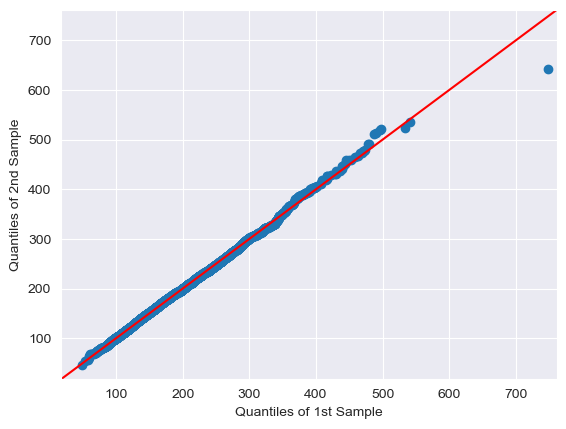

In [31]:
S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=5000, plot=False, hist=False)
S_t_disc = np.array(S_t[0])
print(S_t_disc)
S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=5000))


sm.qqplot_2samples(S_t_cont, S_t_disc, line='45')
plt.show()


In [32]:
for M in [50,500,5000,50000]:
    S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=M, plot=False, hist=False)
    S_t_disc = np.array(S_t[0])
    S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=M))
    print(f"M = {M}\n Continuous mean: {S_t_cont.mean()}, var: {S_t_cont.var()}")
    print(f" Discrete mean: {S_t_disc.mean()}, var: {S_t_disc.var()}")

M = 50
 Continuous mean: 196.78901308636472, var: 3298.2181303416805
 Discrete mean: 184.90394372084523, var: 4491.907836775175
M = 500
 Continuous mean: 186.4550316926062, var: 4094.4285473118543
 Discrete mean: 185.16318330651936, var: 3697.2843068718835
M = 5000
 Continuous mean: 188.2704701149245, var: 4383.656788075621
 Discrete mean: 187.8123793161773, var: 4481.04564202681
M = 50000
 Continuous mean: 188.4383029504697, var: 4406.935005586629
 Discrete mean: 187.89884627719593, var: 4413.661483319208


### Subtask c)

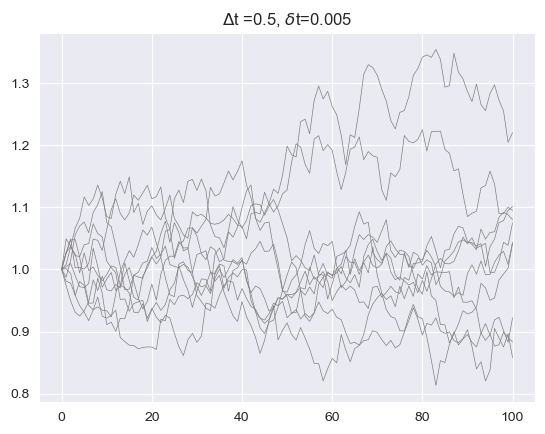

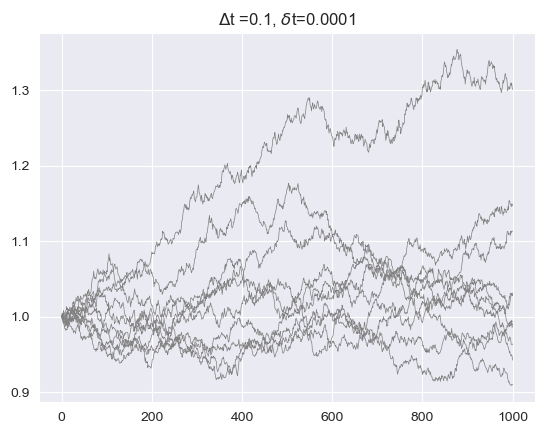

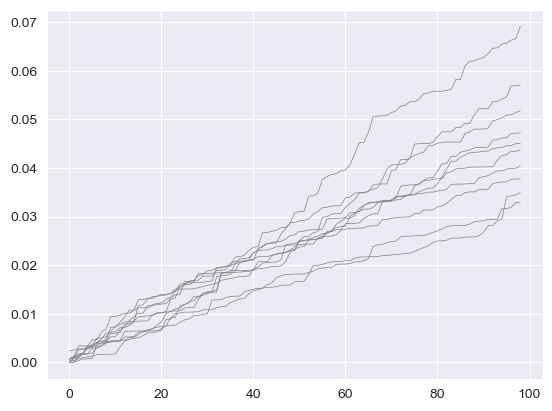

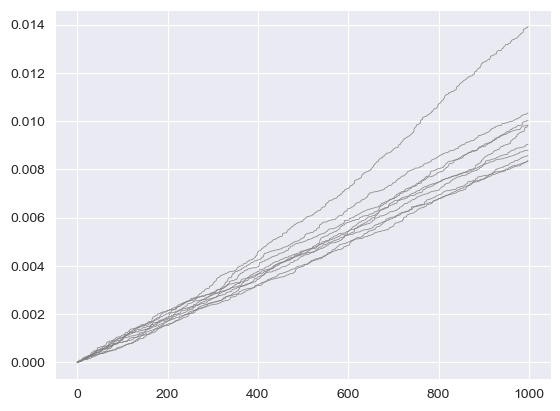

In [21]:
a,b = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[100], T=0.5, M=10,sum_squares=True, plot=True, hist=False)
c,d = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[1000], T=0.1, M=10, sum_squares=True, plot=True, hist=False)
#print(str(b.shape))

#print(np.cumsum(b[0]))
for i in range(10):
    plt.plot(np.cumsum(b[i]), color='gray', linewidth=0.5)
plt.show()
for i in range(10):
    plt.plot(np.cumsum(d[i]), color='gray', linewidth=0.5)
plt.show()
#print("_")

## Exercise 4

### Subtask a)

Let us take a look at the Black-Scholes formula (8.19) for a European call option:
$$C(S, t) = S_t N(d_1) - E e^{-r(T-t)} N(d_2)$$

If we were to take n similar calls, the equation would become:
$$nC(S, t; E) = nS_t N(d_1) - nE e^{-r(T-t)} N(d_2) = n(S_t N(d_1) - E e^{-r(T-t)} N(d_2)) = nC(S, t)$$

This can also be replicated for the European put options:

$$ nP(S, t) = nE e^{-r(T-t)} N(-d_2) - nS_t N(-d_1) = n(E e^{-r(T-t)} N(-d_2) - S_t N(-d_1)) = nP(S, t)$$

As such, the value of European options is linear with respect to the number of options.

### Subtask b)

In short, a butterfly spread is an option strategy that consists of three options with the same expiration date: 
- A long position in a European call option with exercise price E1.
- A short position in two European call options with exercise price E2, where E2 = (E1 + E3)/2.
- A long position in a European call option with exercise price E3, where E3 > E1.

#### Black-Scholes PDE
The general Black-Scholes formula for a generic derivative is as follows:

$$\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - r V = 0
$$

For the butterfly spread, the value can be obtained by summing the values of the three options. As such, the value of the butterfly spread is given by:
$$ V(S, t) = C(S, t; E_1) - 2C(S, t; E_2) + C(S, t; E_3)$$

#### Final time conditions

The final time conditions for a butterfly spread can be represented as follows:
$$ V(S_T, T) = max(S_T - E_1, 0) - 2max(S_T - E_2, 0) + max(S_T - E_3, 0), \text{ where } E_2 = \frac{E_1+E_3}{2}.$$

The function above has three points where linearity changes, at $E_1$, $E_2$ and $E_3$. Let us investigate the values of V for the three points:
- For $S_T = E_1$, the value of V is $max(E_1 - E_1, 0) = 0$.
- For $S_T = E_2 = \frac{E_1+E_3}{2}$, the value of V is $ max(\frac{E_3 - E_1}{2},0) - max(0,0) + max(\frac{E_1 - E_3}{2},0) = \frac{E_3-E_1}{2}$.
- For $S_T = E_3$, the value of V is $max(E_3 - E_3, 0) = 0$.

From this, we can deduce the general form of the payoff diagram, and as such, the final time conditions:   

<img height="200" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage1.slideserve.com%2F2853487%2Flong-put-butterfly-payoff-diagram-l.jpg&f=1&nofb=1&ipt=aa21b061a529b1921a3144089d05890f39185ee45752079974ad067126c83000&ipo=images" width="350"/>

#### Boundary conditions

$$ V(0, t) = 0, \text{ for all } t \le T, \text{since }S_0 = 0 \rightarrow S_t = 0.$$

$$  \lim_{S \to \infty} V(S, t) \approx 0, \text{ since the values of each specific call will cancel each other out.}$$

## Exercise 5

### Subtask a)

In [22]:
E = 170
S0 = 170
T = 1
L = 100 
delta_t = 0.01
r = 0.05
sigma = 0.344
mu = 0.1

In [23]:
def simulate_portfolio(plot = False, S_0 = 170, seed=42, verbose=False):
    """
    Simulates the portfolio value over time
    :param plot: whether to plot the results
    :param S_0: the initial price of the asset
    :param seed: the seed for the random number generator
    :param verbose: whether to print the status of the option (in the money or out of the money)
    :return:  the final price of the asset and the payoff of the option
    """
    # the value of a put option at time zero
    d1 = ((np.log(S_0/E) + (r + (sigma**2)/2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    init_put = E*np.exp(-r*T)*stats.norm.cdf(-d2) - S_0*stats.norm.cdf(-d1)
    
    np.random.seed(seed)
    #print(d1)
    delta = [stats.norm.cdf(d1)-1]
    cash = [100]
    S = [S_0]
    port = [delta[0]*S[0] + cash[0]]
    for i in range(1, L):
        S.append(step(S[-1], mu, sigma, T, L))
        new_port_a = delta[-1]*S[-1] + cash[-1]*(1+r*delta_t)
        
        d1 = (np.log(S[-1]/E) + (r + (sigma**2)/2)*(T-i*delta_t))/(sigma*np.sqrt(T-i*delta_t))
        delta.append(stats.norm.cdf(d1)-1)
        
        new_cash = cash[-1]*(1+r*delta_t) + (delta[-2] - delta[-1])*S[-1]
        cash.append(new_cash)
            
        new_port_b = delta[-1]*S[-1] + cash[-1]
        assert abs(new_port_a - new_port_b) < 1e-3
        port.append(new_port_b)
        
    if plot:
        
        plt.figure(figsize=(10,1.5))
        plt.plot(S)
        plt.title('Asset Path')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(port)
        plt.title('Portfolio Value')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(cash)
        plt.title('Cash')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(delta)
        plt.title('Delta')
        plt.show()
        #print(delta)
    if verbose:
        if S[-1] > E:
            print("Option is out the money")
        else:
            print("Option is in the money")
    # print(port[-1]+(E-S[-1])*np.exp(r*T))
    # print(S[-1])
    return S[-1], port[-1]+(init_put - port[0])*np.exp(r*T)

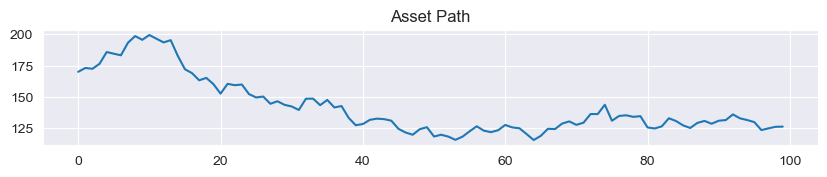

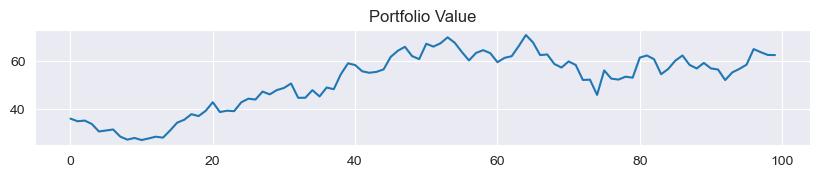

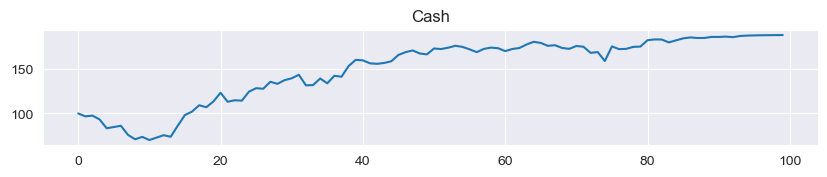

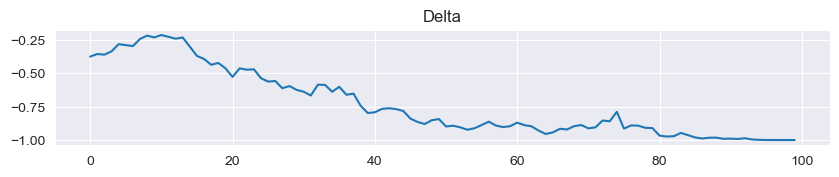

Option is in the money
-------------------------------


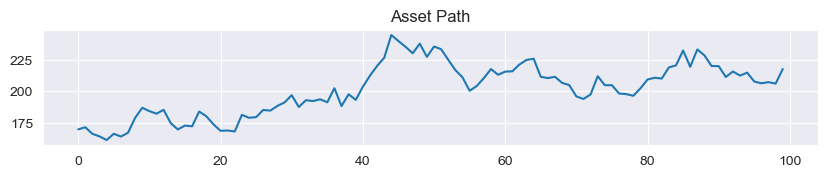

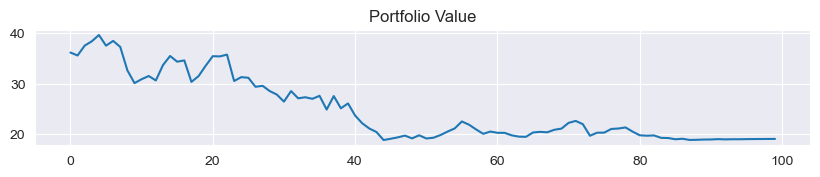

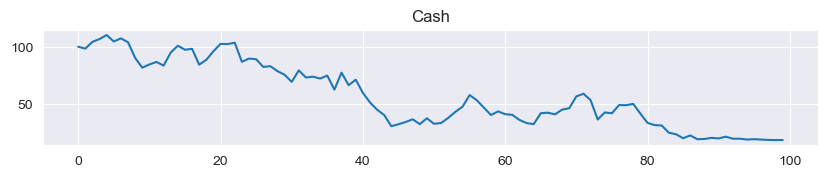

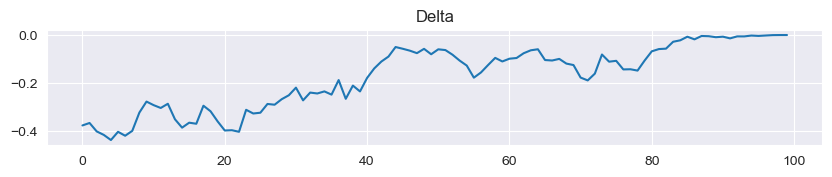

Option is out the money
_


In [24]:
simulate_portfolio(True, seed=42, verbose=True)
print("-------------------------------")
simulate_portfolio(True, seed=43, verbose=True)
print("_")


### Subtask b)

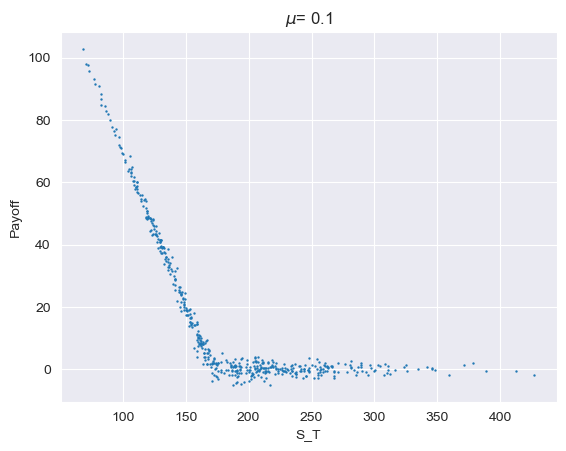

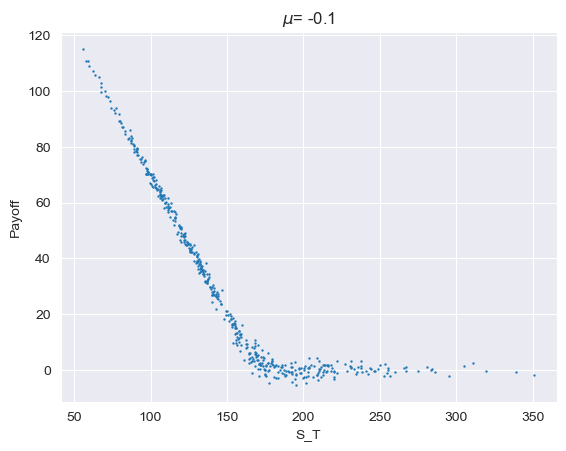

In [25]:
M=500
xs = []
ys= []
for i in range(M):
    x,y = simulate_portfolio(seed=i)
    xs.append(x)
    ys.append(y)
# smaller dot size
plt.title("$\\mu$= "+str(mu))
plt.scatter(xs, ys, s=0.5)
plt.xlabel('S_T')
plt.ylabel('Payoff')
plt.show()

xs = []
ys= []
mu = -0.1
for i in range(M):
    x,y = simulate_portfolio(seed=i)
    xs.append(x)
    ys.append(y)

plt.title("$\\mu$= "+str(mu))
plt.scatter(xs, ys, s=0.5)
plt.xlabel('S_T')
plt.ylabel('Payoff')
plt.show()


As we can see, the graphs for both $\mu = 0.1$ and $\mu = -0.1$ are similar, with the payoff being mostly concentrated around the initial price of the asset. As such, we can conclude that $-\mu$ and $\mu$ are equivalent in terms of the payoff of the option. 